In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

**Load the Dataset**

**The CIFAR-10 dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## **Explore the Dataset**

In [ ]:
(X_train.shape,X_test.shape)

((50000, 32, 32, 3), (10000, 32, 32, 3))

**Inferences**

We can infer that train data is 50000 images and test data is 10000 images. All images are of size 32*32 and they are color images(RGB).

In [ ]:
(y_train.shape,y_test.shape)

((50000, 1), (10000, 1))

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

We can infer that y is stored as 2D array . But we need to convert our y to 1D array

In [ ]:
y_train1D=y_train.reshape(-1,)
y_test1D=y_test.reshape(-1,)
(y_train1D.shape,y_test1D.shape)

((50000,), (10000,))

In [ ]:
output_class_labels=["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

**Inference**

The dataset has 10 classes and classes are equally balanced

In [ ]:
y_train1D

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(output_class_labels[y[index]])

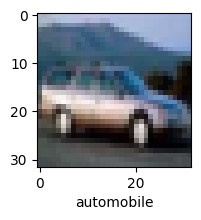

In [ ]:
plot_sample(X_train,y_train1D,4)

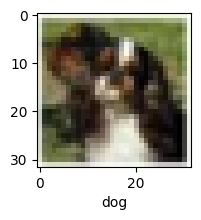

In [ ]:
plot_sample(X_train,y_train1D,500)

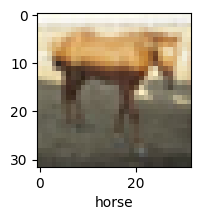

In [ ]:
plot_sample(X_train,y_train1D,2000)

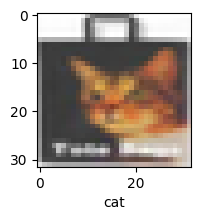

In [ ]:
plot_sample(X_train,y_train1D,3000)

## **Building a CNN model**

In [ ]:
cnn=models.Sequential([
    #kernel_size here is the filter size
    layers.Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(3,3),activation='relu'),

    #The pooling image size
    layers.MaxPooling2D((2,2)),

    #Creatng 1 more set of layers to make our model more robust and efficient
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #We have extracted all the features in previous layers and now flattening our data as this is necessary to feed it to next Dense layer
    layers.Flatten(),

    #This is a fully connected layer which has 64 neurons
    layers.Dense(64,activation='relu'),

    #This is the final output layer which has 10 as our data has 10 classes
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

**Conv2d**, 32 (filters) *3 * 3 (filter_size) =288 * 3 (RGB) = 864 + 32 (bias) = 896

In [ ]:
#Use sparse_categorical_crossentropy as our y_train is not one hot encoded
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## **Experimenting the model with only one Convolution and Pooling layer**

In [ ]:
cnn1=models.Sequential([
    #kernel_size here is the filter size
    layers.Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(3,3),activation='relu'),
    #The pooling image size
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

## **Compile the model**

In [ ]:
cnn1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## **Train the model**

In [ ]:
cnn_training=cnn.fit(X_train,y_train1D,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 44ms/step - accuracy: 0.1552 - loss: 4.0472 - val_accuracy: 0.4104 - val_loss: 1.6180
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.4568 - loss: 1.5063 - val_accuracy: 0.5131 - val_loss: 1.3750
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.5521 - loss: 1.2522 - val_accuracy: 0.5633 - val_loss: 1.2418
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5970 - loss: 1.1258 - val_accuracy: 0.6045 - val_loss: 1.1434
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6422 - loss: 1.0210 - val_accuracy: 0.5619 - val_loss: 1.2758


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


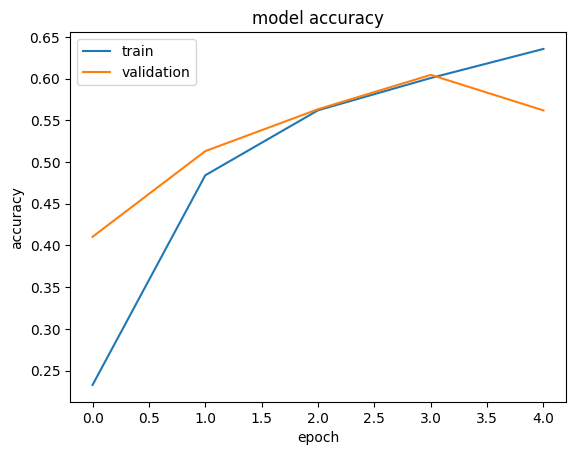

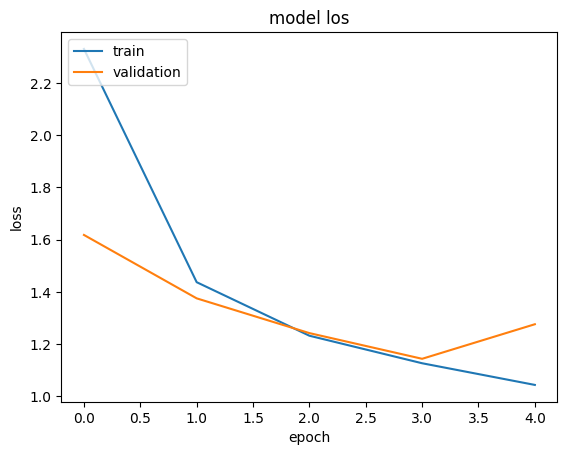

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training , training has a dictionary called history and its printing all the keys in history dictionary
print(cnn_training.history.keys())

# summarize training for accuracy
plt.plot(cnn_training.history['accuracy']) # training accuracy values
plt.plot(cnn_training.history['val_accuracy']) #validation accuracy values
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(cnn_training.history['loss']) # training loss values
plt.plot(cnn_training.history['val_loss']) #validation loss values
plt.title('model los')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## **Evaluating the model on Test dataset**

In [ ]:
cnn.evaluate(X_test,y_test1D)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5682 - loss: 1.2832


[1.274257779121399, 0.567799985408783]

### **We can infer that the model loss is 1.23 and accuracy is 57%**

In [ ]:
y_test_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


In [ ]:
y_test_pred[0]

array([0.04419517, 0.00063813, 0.01316683, 0.21551746, 0.0080191 ,
       0.04032592, 0.04088575, 0.00146914, 0.6295659 , 0.00621658],
      dtype=float32)

In [ ]:
y_test_classes=[int(np.argmax(element)) for element in y_test_pred]

In [ ]:
y_test_classes[0]

8

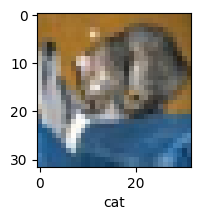

In [ ]:
plot_sample(X_test,y_test1D,0)

## **Inferences**
The y_test_pred returns the probability values for each classes and we are taking the max probability among them and returning that the image falls under that class , 0.47 in our example which is in 3rd index and index 3 is cat. Then we are plotting the sample from our actual y_test data and checking if it matched our prediction

### **Let's try with a different image**

In [ ]:
y_test_pred[2] #acc to this output, the image is of class automobile

array([6.5543509e-01, 3.0218508e-02, 2.1153598e-03, 5.3454528e-04,
       2.1104883e-04, 4.6899939e-05, 4.2850949e-04, 2.1425840e-05,
       2.7577826e-01, 3.5210397e-02], dtype=float32)

In [ ]:
y_test_classes[2]

0

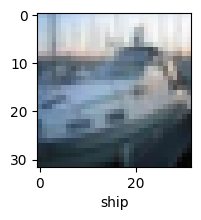

In [ ]:
plot_sample(X_test,y_test1D,2)

## **Inferences**
But, with a different index it doesn't match our prediction and the actual image. As our model accuracy is only 57% this is expected.

## **Let's try the model with 10 epochs and check if the model is trained better**

In [ ]:
cnn_training=cnn.fit(X_train,y_train1D,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.6706 - loss: 0.9436 - val_accuracy: 0.6303 - val_loss: 1.0849
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6898 - loss: 0.8930 - val_accuracy: 0.6323 - val_loss: 1.0859
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.7114 - loss: 0.8298 - val_accuracy: 0.6234 - val_loss: 1.1240
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7332 - loss: 0.7678 - val_accuracy: 0.6419 - val_loss: 1.0963
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7438 - loss: 0.7341 - val_accuracy: 0.6292 - val_loss: 1.1533
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7652 - loss: 0.6834 - val_accuracy: 0.6379 - val_loss: 1.1393
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7773 - loss: 0.6492 - val_accuracy: 0.6382 - val_loss: 1.1621
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7834 -

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


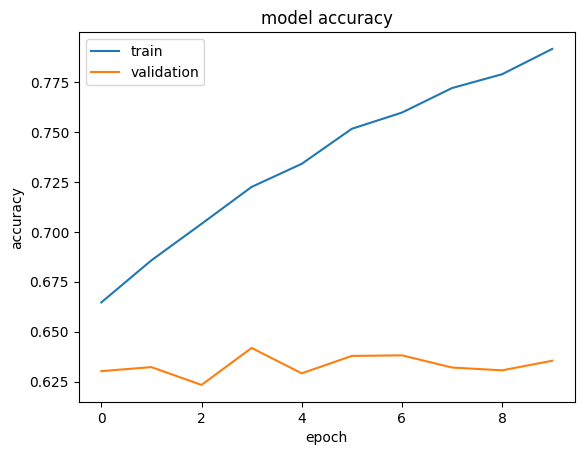

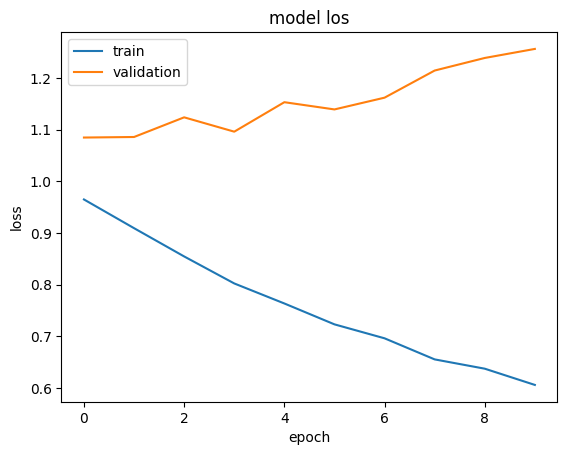

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training , training has a dictionary called history and its printing all the keys in history dictionary
print(cnn_training.history.keys())

# summarize training for accuracy
plt.plot(cnn_training.history['accuracy']) # training accuracy values
plt.plot(cnn_training.history['val_accuracy']) #validation accuracy values
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(cnn_training.history['loss']) # training loss values
plt.plot(cnn_training.history['val_loss']) #validation loss values
plt.title('model los')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
cnn.evaluate(X_test,y_test1D)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6282 - loss: 1.2943


[1.278536319732666, 0.6341999769210815]

In [ ]:
y_test_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [ ]:
y_test_pred[2]

array([1.4224340e-01, 4.3804604e-03, 4.6419273e-03, 5.8185559e-04,
       3.1192912e-04, 3.9215168e-04, 6.2662344e-05, 1.1079295e-03,
       8.4284985e-01, 3.4277632e-03], dtype=float32)